In [ ]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/bw-image-colorization/bw-colorization.zip
!unzip -qq bw-colorization.zip
%cd bw-colorization

This demo is another approach of our team which trying to implement a new method to turn a balck and white picture into a  colorized picture.

Different with the regular colorized project.
This approach didinot use the regular RGB channel.
It instead use L channel to encodes the lightness intensity ,use alpha channel to encodes green-red and use the b channel encodes blue-yellow






First Import the Package


In [16]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2


Then there is the function going to use

In [17]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Then colorize black and white images with open cv

In [18]:

args = {
	"image": "images/albert_einstein.jpg",
    "prototxt": "model/colorization_deploy_v2.prototxt",
    "model": "model/colorization_release_v2.caffemodel",
    "points": "model/pts_in_hull.npy"
}

In [19]:


net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])
pts = np.load(args["points"])

# add the cluster centers as 1x1 convolutions to the model
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

Load the image and scale it. And then convert the image from the BGR to the lab color space.

In [20]:

image = cv2.imread(args["image"])
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

Resize the Lab image

In [21]:

resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

In [22]:
# pass the L channel through the network predict the 'a'and 'b' channel values

net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

# resize the predicted 'ab' volume to the same dimensions as the input image
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

 Colorized Output

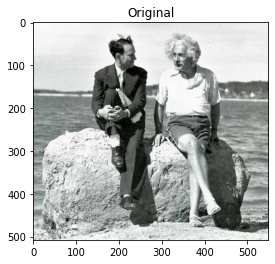

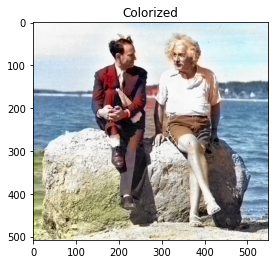

In [23]:

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)


colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)


colorized = (255 * colorized).astype("uint8")


plt_imshow("Original", image)
plt_imshow("Colorized", colorized)

Reference: https://www.pyimagesearch.com/2019/02/25/black-and-white-image-colorization-with-opencv-and-deep-learning/

Team: Fangzhou, Garima and Ahmet.